# Hoja de trabajo 4
## Modelos de regresión lineal

#### Integrantes:
- Diego Leiva 21752
- Gabriel Garcia
- Pablo Orellana

### Analisis Exploratorio de la data

**Importar librerias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar el dataset al entorno**

In [2]:
df = pd.read_csv('insurance.csv', sep=',')

**Visualizar estructura e información general del dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- age: Edad del asegurado.
- sex: Sexo del asegurado.
- bmi: Índice de masa corporal
- children: Número de hijos cubiertos por el seguro de salud.
- smoker: Si el asegurado fuma o no.
- region: Área residencial del asegurado
charges: Cargos por seguro de salud.

**Estadísticas descriptivas de las variables numéricas**

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Las estadísticas descriptivas del dataset "Insurance" revelan lo siguiente:

- Edad: Varía entre 18 y 64 años, con una media de aproximadamente 39 años.
- Índice de Masa Corporal: El BMI promedio es de 30.66, lo que sugiere que en promedio, los asegurados se inclinan hacia el sobrepeso según las categorías estándar de BMI. El rango de BMI va de 15.96 a 53.13.
- Hijos: La mayoría de los asegurados tienen entre 0 y 5 hijos, con una media ligeramente superior a 1.
- Cargos: Los cargos por el seguro varían significativamente, desde $1121.87 hasta $63770.43, con una media de $13270.42.

**Verificar existencia de valores nulos**

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No hay valores faltantes o nulos.

**Conteo de valores únicos en características categorías**

In [7]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Solo esta el sexo masculino y femenino

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Las regiones son 4: noreste, noroeste, sureste, suroeste

In [9]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Es una columna de tipo booleana

**Gráficas de distribución**

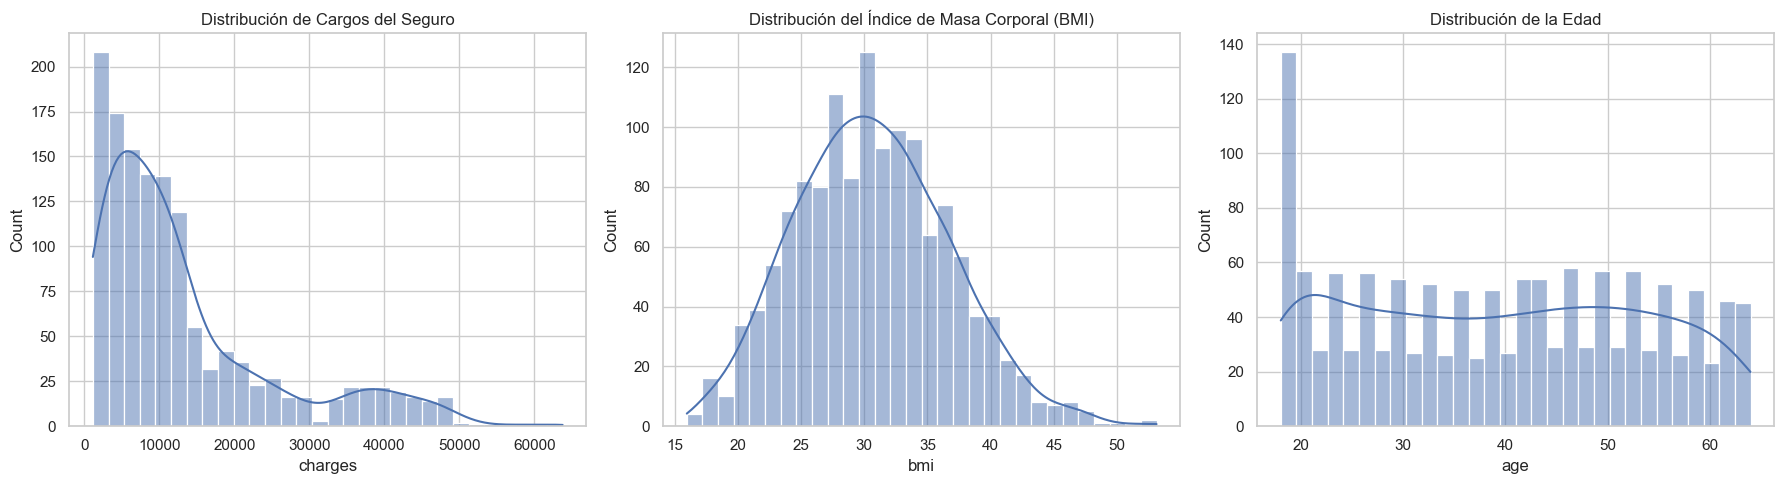

In [10]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear figuras para las distribuciones
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Distribución de Charges
sns.histplot(df['charges'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribución de Cargos del Seguro')

# Distribución de BMI
sns.histplot(df['bmi'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribución del Índice de Masa Corporal (BMI)')

# Distribución de Age
sns.histplot(df['age'], bins=30, kde=True, ax=ax[2])
ax[2].set_title('Distribución de la Edad')

plt.tight_layout()
plt.show()

- Cargos del Seguro: La distribución de los cargos del seguro es asimétrica a la derecha, con la mayoría de los asegurados incurriendo en cargos más bajos y un número menor de asegurados enfrentando cargos muy altos. Esto sugiere que mientras la mayoría de los asegurados podrían estar en planes menos costosos o tener menos necesidades médicas, hay un grupo significativo con gastos mucho mayores, posiblemente debido a condiciones médicas crónicas o factores de riesgo elevados.

- Índice de Masa Corporal: La distribución del BMI es aproximadamente normal, con un ligero sesgo hacia valores más altos, indicando que una porción considerable de la población asegurada tiene sobrepeso. Esto es relevante ya que el BMI elevado está asociado con un mayor riesgo de condiciones de salud que podrían afectar los costos del seguro.

- Edad: La distribución de la edad muestra una amplia representación de edades entre los asegurados, con picos menores en los extremos inferiores y superiores del rango de edad. Esto indica una diversa población asegurada en términos de edad.

**Correlación entre las variables**

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

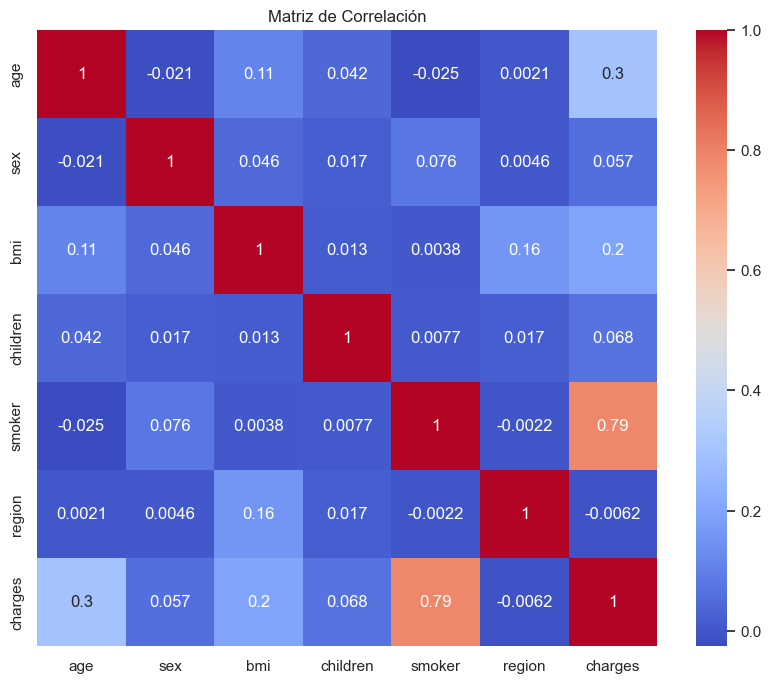

In [12]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


- La variable cargos del seguro muestra una correlación positiva moderadamente fuerte con fumador, lo que sugiere que ser fumador es un factor significativo en el aumento de los costos del seguro. Esto es lógico, ya que fumar está asociado con un mayor riesgo de enfermedades.

- Hay correlaciones positivas más débiles entre cargos y otras variables como edad y bmi, indicando que la edad y el BMI también contribuyen al costo del seguro, aunque en menor medida en comparación con el hábito de fumar.

- La correlación entre bmi y edad es relativamente baja, lo que sugiere que no hay una colinealidad significativa entre estas dos variables.

- Las variables hijos, regiones y sexo tienen correlaciones bajas con cargos, sugiriendo que estos factores tienen un impacto menos directo en los costos del seguro.

**Division del dataset en conjuntos de entrenamiento y prueba**

In [13]:
from sklearn.model_selection import train_test_split

# Definir las variables independientes (X) y la variable dependiente (y)
x = df.drop(['charges'], axis=1)
y = df['charges']

# Dividir los datos en conjuntos de entrenamiento y prueba, fijando el random_state para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1070, 6), (268, 6), (1070,), (268,))

**Estandarización de las características**

In [14]:
from sklearn.preprocessing import StandardScaler

# Columnas a escalar
columns_names=['age','sex','bmi','children', 'smoker', 'region', 'charges']

# Inicializar el escalador
scaler = StandardScaler()

# Escalar las características
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Seleccion del modelo**

In [15]:
from sklearn.linear_model import LinearRegression

# Model de regresion lineal
linear_model = LinearRegression()

**Entrenamiento y ajuste del modelo**

In [16]:
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
#Obtenemos interceptos.

intercept = linear_model.intercept_
intercept

13346.089736364485

In [18]:
#Obtenemos los coeficientes de las caracteristicas

coef = linear_model.coef_
coef

array([ 3.61610865e+03, -9.39295411e+00,  2.02830858e+03,  5.16662566e+02,
        9.55714338e+03, -3.02387980e+02])

**Predicciones con el modelo**

In [19]:
y_pred = linear_model.predict(X_test_scaled)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

**Evaluar la precision del modelo**

In [20]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# MAE
mae2 = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae2}")

# MAPE
mape2 = mean_absolute_percentage_error(y_test,y_pred)
# Para MAPE, evitamos dividir por cero; agregamos un pequeño número al denominador
# Aqui lo escribimos en base a como esta definido el MAPE
mape3 = np.mean(np.abs((y_test - y_pred) / (y_test + 1e-10)))
print(f"Mean Absolute Porcentage Error: {mape3}")

# MSE
mse2 = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse2}")

# RMSE
rmse2 = np.sqrt(mse2)
print(f"Root Mean Square Error: {rmse2}")

# R2
r_squared2 = r2_score(y_test, y_pred)
print(f"R squared: {r_squared2}")

print("Intercept: ", intercept)
print("Coefficient: ", coef)

Mean Absolute Error: 4186.508898366437
Mean Absolute Porcentage Error: 0.4709302952729447
Mean Squared Error: 33635210.431178436
Root Mean Square Error: 5799.587091438359
R squared: 0.7833463107364537
Intercept:  13346.089736364485
Coefficient:  [ 3.61610865e+03 -9.39295411e+00  2.02830858e+03  5.16662566e+02
  9.55714338e+03 -3.02387980e+02]


**Graficar Modelo**

In [21]:
from sklearn.decomposition import PCA
X_scaled = scaler.fit_transform(X_test_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

y_pred = linear_model.predict(X_scaled)

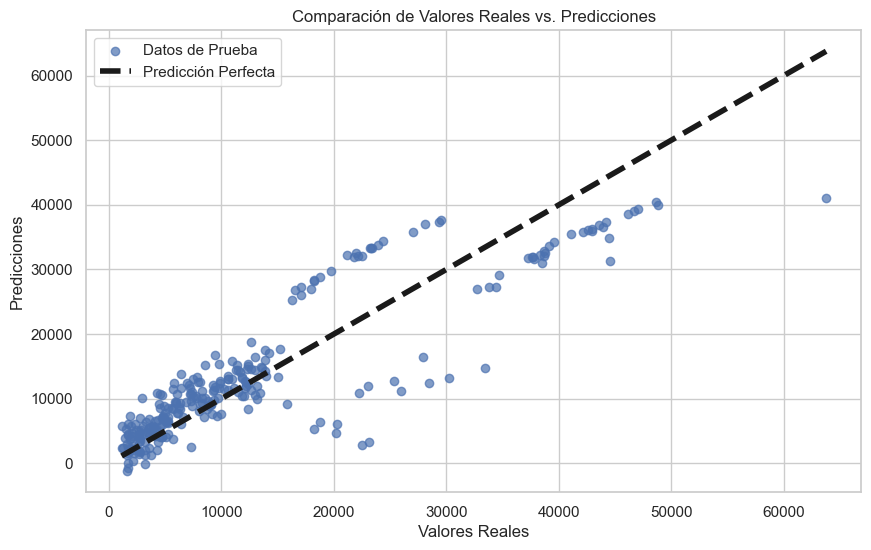

In [22]:
# Generar la gráfica de valores reales vs. predichos

# Configura el tamaño de la figura que contendrá la gráfica.
# Anchi = 10, Alto 6
plt.figure(figsize=(10, 6))

# Creamos gráfico de dispersión con valores reales de prueba (y_test) en el eje x
# Las predicciones del modelo (y_pred) en el eje y 
plt.scatter(y_test, y_pred, alpha=0.7, label='Datos de Prueba')

# Dibuja linea que indicaria donde deberian estar los puntos si predicciones fueran perfectas.
# Los primeros dos parametros son rangos para cada eje.
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.legend()
plt.show()

**Selección de características relevantes**

In [23]:
coefficients = linear_model.coef_

# Calcular la importancia relativa de cada variable en porcentaje
importance = 100 * (abs(coefficients) / abs(coefficients).sum())

# Suponiendo que 'X.columns' contiene los nombres de las variables independientes
variables_importance = pd.DataFrame(importance, index=x.columns, columns=['Importancia (%)'])

# Mostrar la tabla ordenada por importancia
print(variables_importance.sort_values(by='Importancia (%)', ascending=False))

          Importancia (%)
smoker          59.620343
age             22.558376
bmi             12.653201
children         3.223097
region           1.886387
sex              0.058596


Tal como se mostro en el grafico de correlaciones, esta claro que fumador, edad y bmi son las 3 variables mas importantes a tomar en cuenta, el siguiente modelo unicamente usara dichas variables.

**Mejorando la calidad del modelo**

In [24]:
# Definir las variables independientes (X) y la variable dependiente (y)
x2 = df.drop(['charges', 'children', 'region', 'sex'], axis=1)
y2 = df['charges']

# Dividir los datos en conjuntos de entrenamiento y prueba, fijando el random_state para reproducibilidad
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Columnas a escalar
columns_names=['age','bmi', 'smoker', 'charges']

# Inicializar el escalador
scaler2 = StandardScaler()

# Escalar las características
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

# Model de regresion lineal
linear_model2 = LinearRegression()

# Ajustar el modelo
linear_model2.fit(X_train_scaled2, y_train2)

#Obtenemos interceptos
intercept2 = linear_model2.intercept_

#Obtenemos los coeficientes de las caracteristicas
coef2 = linear_model2.coef_

# Predicciones del modelo
y_pred2 = linear_model2.predict(X_test_scaled2)

# MAE
mae2 = mean_absolute_error(y_test2, y_pred2)
print(f"Mean Absolute Error: {mae2}")

# MAPE
mape2 = mean_absolute_percentage_error(y_test2, y_pred2)
# Para MAPE, evitamos dividir por cero; agregamos un pequeño número al denominador
# Aqui lo escribimos en base a como esta definido el MAPE
mape3 = np.mean(np.abs((y_test2 - y_pred2) / (y_test2 + 1e-10)))
print(f"Mean Absolute Porcentage Error: {mape3}")

# MSE
mse2 = mean_squared_error(y_test2, y_pred2)
print(f"Mean Squared Error: {mse2}")

# RMSE
rmse2 = np.sqrt(mse2)
print(f"Root Mean Square Error: {rmse2}")

# R2
r_squared2 = r2_score(y_test2, y_pred2)
print(f"R squared: {r_squared2}")

print("Intercept: ", intercept2)
print("Coefficient: ", coef2)


Mean Absolute Error: 4260.560091099392
Mean Absolute Porcentage Error: 0.49570491479586587
Mean Squared Error: 34512843.880227886
Root Mean Square Error: 5874.763304187488
R squared: 0.7776932310583375
Intercept:  13346.089736364485
Coefficient:  [3649.22243928 1971.94254098 9568.27908831]


**Graficar el nuevo modelo**

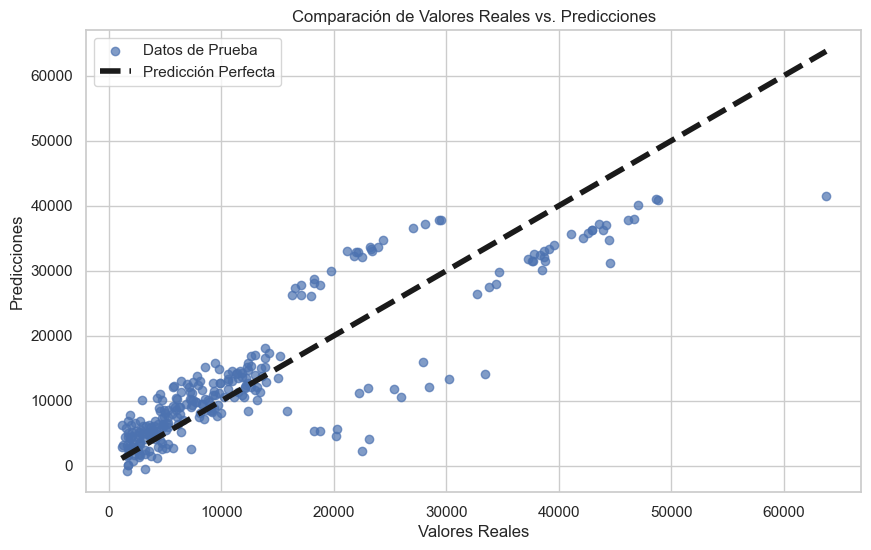

In [25]:
X_scaled2 = scaler2.fit_transform(X_test_scaled2)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled2)

y_pred2 = linear_model2.predict(X_scaled2)

plt.figure(figsize=(10, 6))

plt.scatter(y_test2, y_pred2, alpha=0.7, label='Datos de Prueba')

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.legend()
plt.show()

Al evaluar el nuevo modelo sin incluir las variables poco significativas, el r cuadrado disminuyo en milesimas. Este cambio en el r cuadrado podria parecer contra intuitivo, sin embargo existen varias posibilidades de dicha disminucion.
- La primera es que aunque estas variables puedan tener una relación débil con la variable objetivo por sí solas, aún pueden contribuir marginalmente al modelo. En otras palabras, pueden capturar una pequeña parte de la variabilidad en los datos que no es capturada por las otras variables. Al removerlas, esta variabilidad ya no es explicada, lo que puede resultar en una disminución del r cuadrado.
- La seguna es que Un modelo más simple (con menos variables) podría tener un r cuadrado ligeramente más bajo en los datos de entrenamiento, pero podría generalizar mejor a datos no vistos. Esto es especialmente relevante cuando consideramos la posibilidad de sobreajuste; un modelo con un r cuadrado muy alto en los datos de entrenamiento puede no desempeñarse tan bien en los datos de prueba.